In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [265]:
df1 = pd.read_csv('Cleaned_IMDB.csv')
df2 = pd.read_csv('Cleaned_Movies.csv')
df3 = pd.read_csv('Budgets.csv')

What is the average movie budget in the past 10 years?

In [119]:
# get some info about the data frame budgets
df3.head(5)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 226.0+ KB


Make sure release_date is a datetime and the index so that I can order the movies by movies from the past 10 years


In [120]:
df3['release_date'] = df3['release_date'].astype('datetime64') 

In [121]:
df3.set_index('release_date', inplace=True)

In [132]:
df3.head()

,movie,production_budget,domestic_gross,worldwide_gross
release_date,,,,
2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
2020-12-31,Moonfall,"$150,000,000",$0,$0
2019-12-31,Army of the Dead,"$90,000,000",$0,$0
2019-12-31,Reagan,"$25,000,000",$0,$0
2019-12-31,355,"$75,000,000",$0,$0


In [143]:
# With the above header, sort the release date
df3.sort_values(by=['release_date'],ascending=False,inplace=True)
df3.head(30)


,movie,production_budget,domestic_gross,worldwide_gross
release_date,,,,
2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
2020-12-31,Moonfall,"$150,000,000",$0,$0
2020-02-21,Call of the Wild,"$82,000,000",$0,$0
2019-12-31,Reagan,"$25,000,000",$0,$0
2019-12-31,Army of the Dead,"$90,000,000",$0,$0
2019-12-31,Rogue City,"$13,000,000",$0,$0
2019-12-31,Eli,"$11,000,000",$0,$0
2019-12-31,Down Under Cover,"$40,000,000",$0,$0
2019-12-31,355,"$75,000,000",$0,$0


In [159]:
#use data from the last 10 years
df4 = df3.loc['2020-12-31':'2010-01-01']
df4 = df4.sort_values(by=['release_date'],ascending=True)
df4.head(15)

,movie,production_budget,domestic_gross,worldwide_gross
release_date,,,,
2010-01-08,Youth in Revolt,"$18,000,000","$15,285,588","$19,685,588"
2010-01-08,Leap Year,"$19,000,000","$25,918,920","$32,618,920"
2010-01-08,Daybreakers,"$20,000,000","$30,101,577","$51,445,503"
2010-01-15,The Last Station,"$18,000,000","$6,617,867","$15,696,146"
2010-01-15,Fish Tank,"$3,000,000","$374,675","$5,922,292"
2010-01-15,The Book of Eli,"$80,000,000","$94,835,059","$158,750,817"
2010-01-15,The Spy Next Door,"$28,000,000","$24,307,106","$46,752,858"
2010-01-22,Legion,"$26,000,000","$40,168,080","$67,647,574"
2010-01-22,Tooth Fairy,"$48,000,000","$60,022,256","$112,610,386"


In [160]:
df4[df4.columns[1:]] = df4[df4.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype('int64')
#remove the dollar sign and commas and change the numbers to integers so that I can calcuate the profit



In [161]:
df4.head()

,movie,production_budget,domestic_gross,worldwide_gross
release_date,,,,
2010-01-08,Youth in Revolt,18000000,15285588,19685588
2010-01-08,Leap Year,19000000,25918920,32618920
2010-01-08,Daybreakers,20000000,30101577,51445503
2010-01-15,The Last Station,18000000,6617867,15696146
2010-01-15,Fish Tank,3000000,374675,5922292


In [162]:
df4['Profit'] = (df4['worldwide_gross'] - df4['production_budget']) #creating a profit column

In [175]:
df4.describe()
df4.head()

,movie,production_budget,domestic_gross,worldwide_gross,Profit
release_date,,,,,
2010-01-08,Youth in Revolt,18000000,15285588,19685588,1685588
2010-01-08,Leap Year,19000000,25918920,32618920,13618920
2010-01-08,Daybreakers,20000000,30101577,51445503,31445503
2010-01-15,The Last Station,18000000,6617867,15696146,-2303854
2010-01-15,Fish Tank,3000000,374675,5922292,2922292


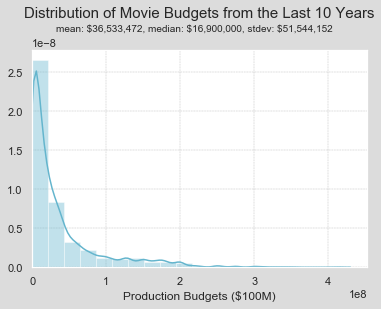

In [225]:
#creating budget distribution plot
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
plt.grid(color='gray', linestyle='-.', linewidth=0.25)

g = sns.distplot(df4.production_budget, bins = 19, color = 'c').set(xlim=(0))

plt.xlabel('Production Budget ($100M)', fontsize = 12)

sns.plotting_context('talk', font_scale = 100)
mean = "\${:,.0f}".format(df4['production_budget'].mean())
medi = "\${:,.0f}".format(df4['production_budget'].median())
stdev = "\${:,.0f}".format(df4['production_budget'].std())
myTitle = "mean: " + mean + ", median: " + medi + ", stdev: " + stdev

plt.suptitle(t=myTitle, fontsize=10,y=0.97)
plt.title('Distribution of Movie Budgets from the Last 10 Years', fontsize = 15, y = 1.12)
plt.savefig('distribution_of_movie_budgets_2010-2020.png')

Text(0.5, 1.12, 'Distribution of Profits from the Last 10 Years')

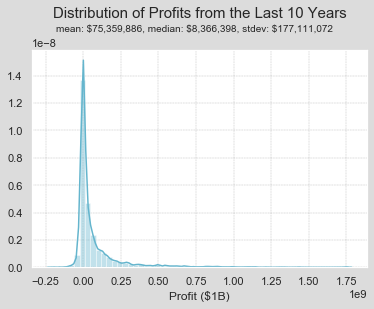

In [234]:
#profit distribution plot
sns.distplot(df4.Profit, bins=55,color = 'c')
plt.grid(color='gray', linestyle='-.', linewidth=0.25)
plt.xlabel('Profit ($1B)', fontsize = 12)

sns.plotting_context('paper', font_scale = 100)

profit = df4['Profit']
mean = "\${:,.0f}".format(profit.mean())
medi = "\${:,.0f}".format(profit.median())
stdev = "\${:,.0f}".format(profit.std())
myTitle = "mean: " + mean + ", median: " + medi + ", stdev: " + stdev

plt.suptitle(t=myTitle, fontsize=10,y=0.97)

plt.title('Distribution of Profits from the Last 10 Years', fontsize = 15, y=1.12)

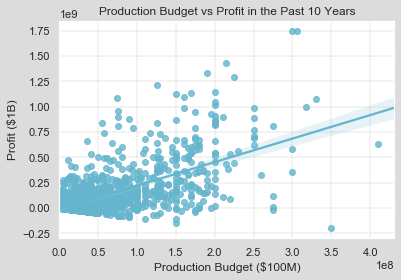

In [446]:

plot = sns.regplot(x = 'production_budget', y = 'Profit', data = df4,color = 'c')
plt.grid(color='gray', linestyle='-.', linewidth=0.25)
plt.title('Production Budget vs Profit in the Past 10 Years')
plt.xlabel('Production Budget ($100M)', fontsize = 12)
plt.ylabel('Profit ($1B)')
plt.xlim(0)
plt.show()

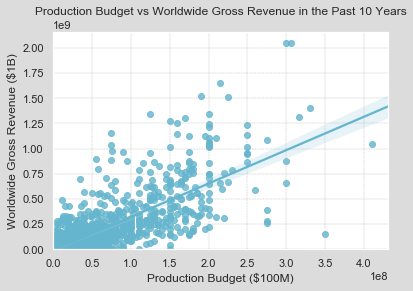

In [449]:

sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = df4, color = 'c').set(xlim=(0),ylim=(0))
plt.grid(color='gray', linestyle='-.', linewidth=0.25)
plt.title('Production Budget vs Worldwide Gross Revenue in the Past 10 Years',y=1.05)
plt.xlabel('Production Budget ($100M)')
plt.ylabel('Worldwide Gross Revenue ($1B)')
plt.show()

Runtime_minutes versus average rating

In [36]:
df1.head()

,primary_title,original_title,start_year,runtime_minutes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,77.0
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,43.0
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9,4517.0
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,13.0
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,119.0


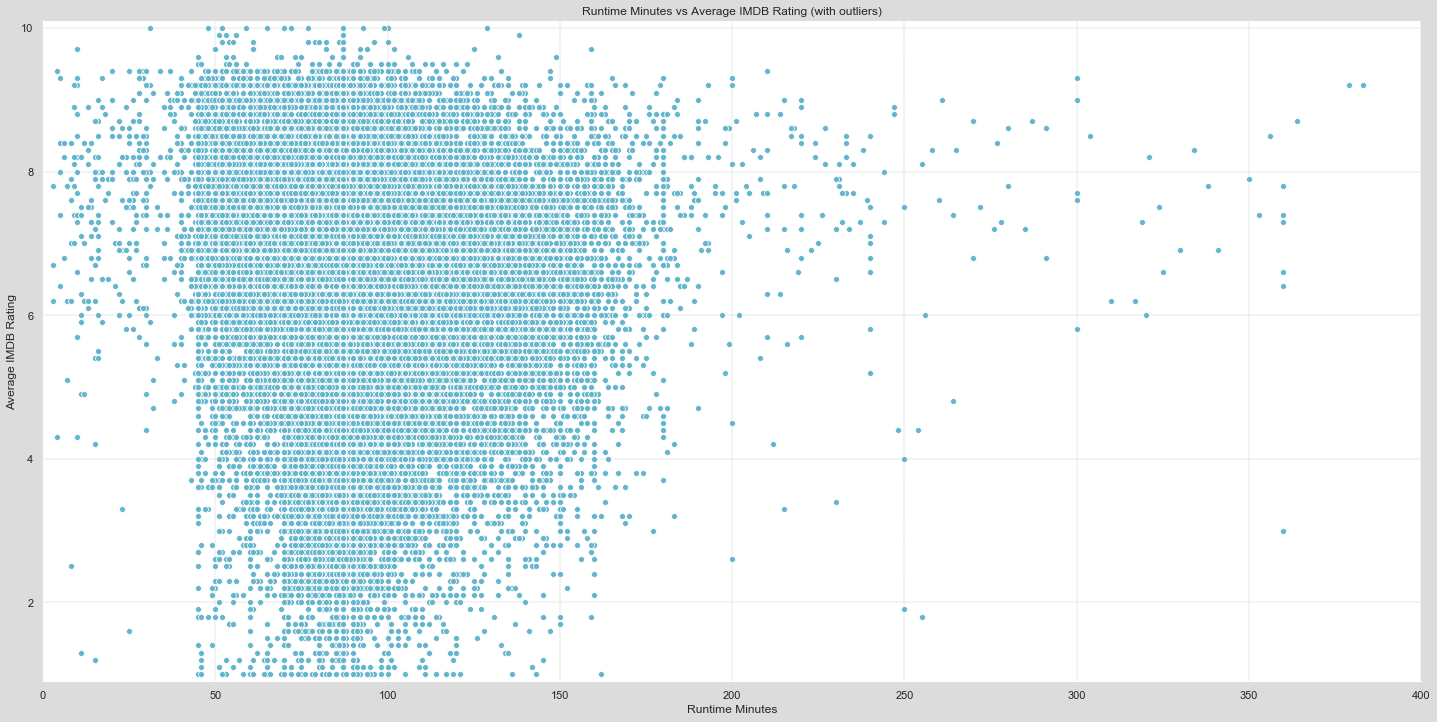

In [270]:
sns.relplot(x = 'runtime_minutes', y = 'averagerating', data = df1, height = 10, aspect = 2, color = 'c')
plt.grid(color='gray', linestyle='-.', linewidth=0.25)
plt.title('Runtime Minutes vs Average IMDB Rating (with outliers)')
plt.xlim(0,400)
plt.ylim(0.9,10.1)
plt.xlabel('Runtime Minutes')
plt.ylabel('Average IMDB Rating')
plt.show()

Realizing that the outliers afffect the runtime minutes distribution, so I changed them to the median

In [38]:
df1.describe()

,start_year,runtime_minutes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averagerating,numvotes
count,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,...,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,73856.000000,7.385600e+04
mean,2014.621798,86.363758,0.070718,0.000171,0.044237,0.019152,0.059681,0.173199,0.046208,0.353350,...,0.064129,0.023025,0.000075,0.015286,0.000342,0.081310,0.009614,0.003195,6.332729,3.523662e+03
std,2.733583,147.191650,0.256354,0.013078,0.205622,0.137061,0.236895,0.378421,0.209936,0.478012,...,0.244983,0.149984,0.008675,0.122690,0.018494,0.273312,0.097578,0.056438,1.474978,3.029402e+04
min,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,4.900000e+01
75%,2017.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.841066e+06


In [39]:
df1.runtime_minutes = df1.runtime_minutes.astype('int64')

In [271]:
#creating a median, std, and oultiers variable in order to replace outliers with the median
median = df1['runtime_minutes'].median() 
std = df1['runtime_minutes'].std()
outliers = (df1['runtime_minutes'] - median).abs() > std
df1[outliers] = np.nan
df1['runtime_minutes'].fillna(median, inplace=True)

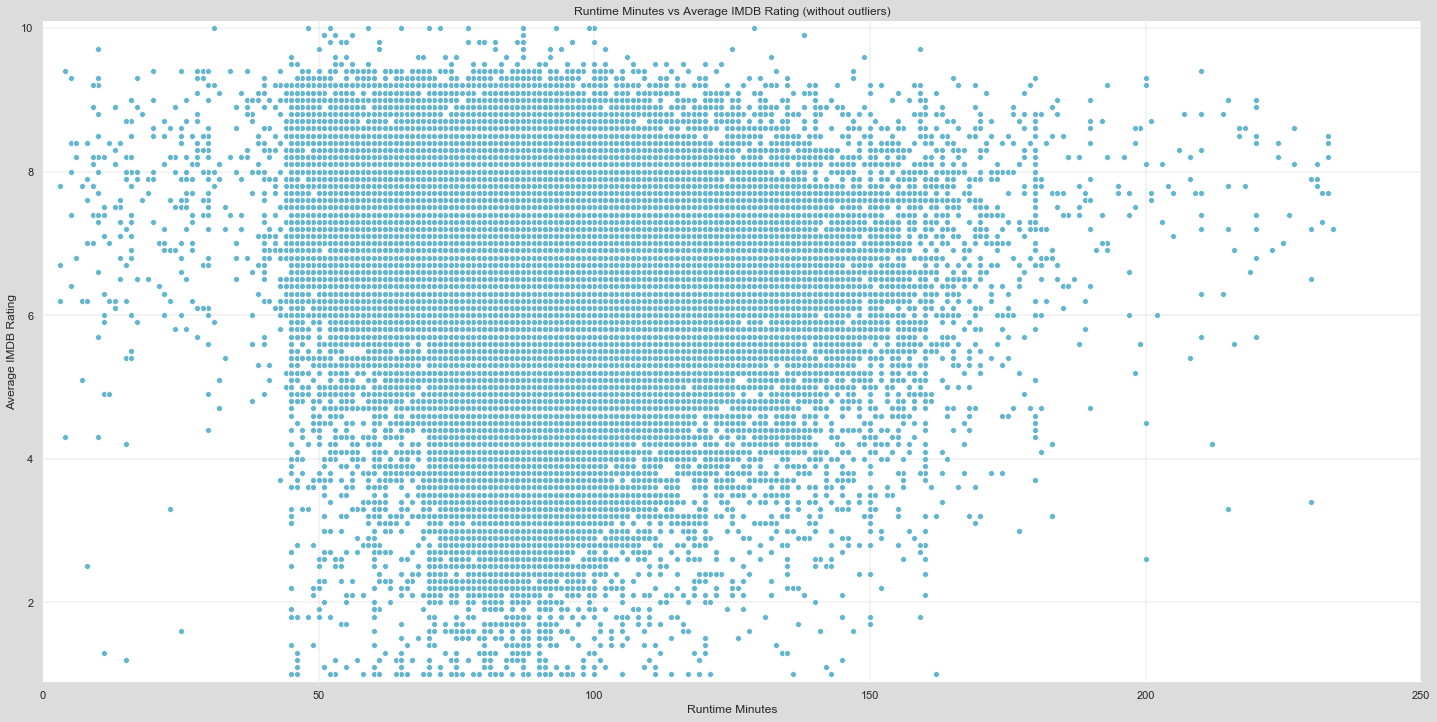

In [273]:
sns.relplot(x = 'runtime_minutes', y = 'averagerating', data = df1, height = 10, aspect = 2, color = 'c')
plt.grid(color='gray', linestyle='-.', linewidth=0.25)
plt.title('Runtime Minutes vs Average IMDB Rating (without outliers)')
plt.xlim(0,250)
plt.ylim(0.9,10.1)
plt.xlabel('Runtime Minutes')
plt.ylabel('Average IMDB Rating')
plt.show()

In [419]:
# dataframe with just runtime and averagerating
dfb = df1[['runtime_minutes','averagerating']]
dfb.head()


,runtime_minutes,averagerating
0,175.0,7.0
1,114.0,7.2
2,122.0,6.9
3,87.0,6.1
4,80.0,6.5


[Text(0, 0, '0-30'),
 Text(0, 0, '30-60'),
 Text(0, 0, '60-90'),
 Text(0, 0, '90-120'),
 Text(0, 0, '120-150'),
 Text(0, 0, '150-180'),
 Text(0, 0, '180+')]

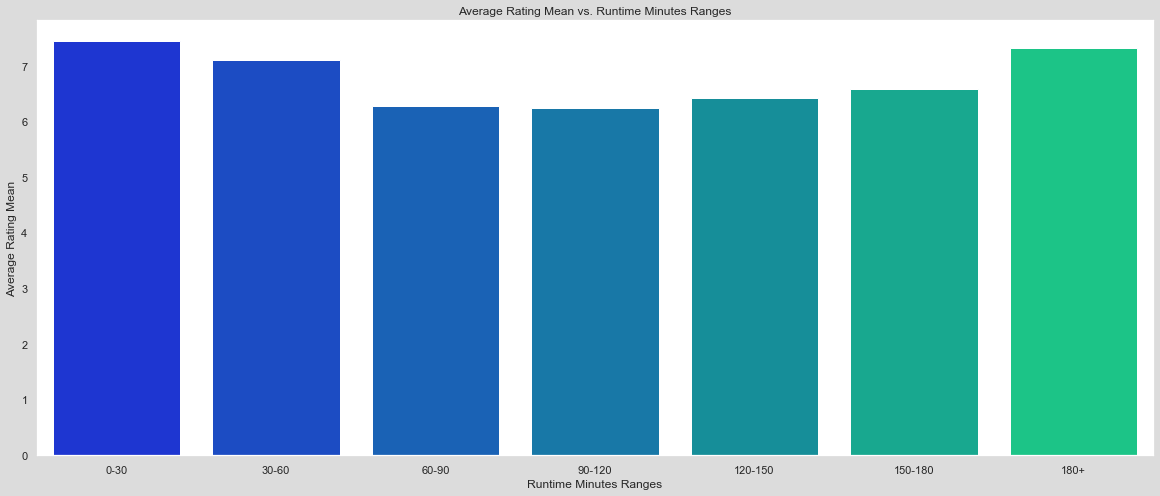

In [442]:
ranges=[0,30,60,90,120,150,180,250]
dfb2 = dfb.groupby(pd.cut(dfb['runtime_minutes'], ranges)) #group by specific runtime ranges
count = dfb2.count()['averagerating']

dfb3 = dfb2.mean()
dfb3['count'] = count
dfb3.head(20)

f, axes = plt.subplots(1,1, figsize = (20,8), sharey = True)
ax = sns.barplot(x='runtime_minutes',y='averagerating',data=dfb3, palette='winter')

plt.title("Average Rating Mean vs. Runtime Minutes Ranges")
plt.xlabel("Runtime Minutes Ranges")
plt.ylabel("Average Rating Mean")

ax.set_xticklabels(['0-30','30-60','60-90','90-120','120-150','150-180','180+'])


[Text(0, 0, '0-30'),
 Text(0, 0, '30-60'),
 Text(0, 0, '60-90'),
 Text(0, 0, '90-120'),
 Text(0, 0, '120-150'),
 Text(0, 0, '150-180'),
 Text(0, 0, '180+')]

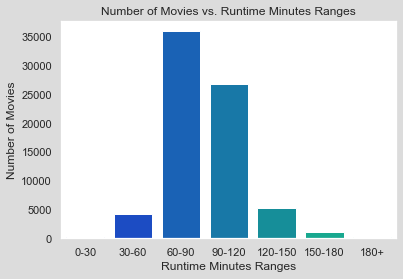

In [440]:
ax = sns.barplot(x='runtime_minutes',y='count',data=dfb3, palette='winter')
plt.title("Number of Movies vs. Runtime Minutes Ranges")
plt.xlabel("Runtime Minutes Ranges")
plt.ylabel("Number of Movies")
ax.set_xticklabels(['0-30','30-60','60-90','90-120','120-150','150-180','180+'])

Text(0.5, 0, 'Runtime Minutes')

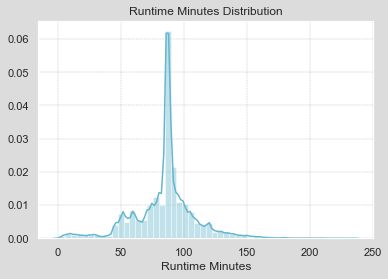

In [369]:
sns.distplot(df1.runtime_minutes, bins = 50, color = 'c')
sns.set_context('notebook')
plt.grid(color='gray', linestyle='-.', linewidth=0.25)
plt.title('Runtime Minutes Distribution')
plt.xlabel('Runtime Minutes')

Genres vs. Popularity

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 26 columns):
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
Music                26517 non-null float64
Romance              26517 non-null float64
Family               26517 non-null float64
War                  26517 non-null float64
TV Movie             26517 non-null float64
Adventure            26517 non-null float64
Fantasy              26517 non-null float64
Animation            26517 non-null float64
Drama                26517 non-null float64
Horror               26517 non-null float64
Action               26517 non-null float64
Comedy               26517 non-null float64
History              26517 non-null float64
Western          

In [44]:
# making sure all values in my genres columns are 1
df2 = df2.replace(2.0,1.0)
df2 = df2.replace(3.0,1.0)


In [45]:
# creating dataframes for each genre without rows that equal 0
Music = df2.loc[df2['Music']>=1]
Romance = df2.loc[df2['Romance']>=1]
Family = df2.loc[df2['Family']>=1]
War = df2.loc[df2['War']>=1]
TV_Movie = df2.loc[df2['TV Movie']>=1]
Adventure = df2.loc[df2['Adventure']>=1]
Fantasy = df2.loc[df2['Fantasy']>=1]
Animation = df2.loc[df2['Animation']>=1]
Drama = df2.loc[df2['Drama']>=1]
Horror = df2.loc[df2['Horror']>=1]
Action = df2.loc[df2['Action']>=1]
Comedy = df2.loc[df2['Comedy']>=1]
History = df2.loc[df2['History']>=1]
Western = df2.loc[df2['Western']>=1]
Thriller = df2.loc[df2['Thriller']>=1]
Crime = df2.loc[df2['Crime']>=1]
Science_Fiction = df2.loc[df2['Science Fiction']>=1]
Mystery = df2.loc[df2['Mystery']>=1]
Documentary = df2.loc[df2['Documentary']>=1]

Text(-2.5, 1.0, 'Popularity Distribution by Genre')

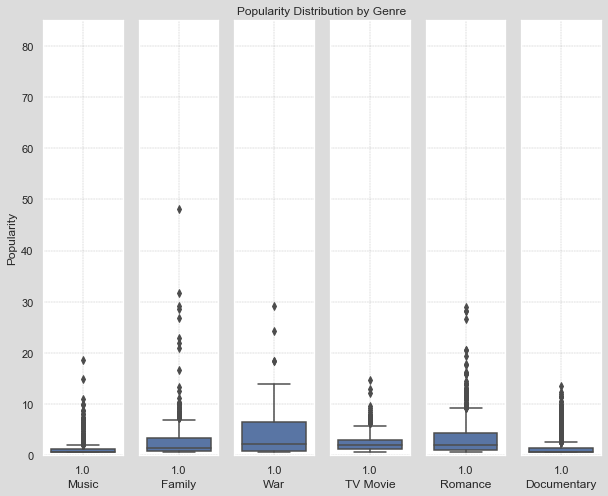

In [410]:
#making three sets of subplots with each genre. 
f, axes = plt.subplots(1,6, figsize = (10,8), sharey = True)
sns.boxplot(  y="popularity", x= "Music", data=Music, orient='v' , ax=axes[0])
sns.boxplot(  y="popularity", x= "Family", data=Family,  orient='v' , ax=axes[1])
sns.boxplot(  y="popularity", x= "War", data=War,  orient='v' , ax=axes[2])
sns.boxplot(  y="popularity", x= "TV Movie", data=TV_Movie,  orient='v' , ax=axes[3])
sns.boxplot(  y="popularity", x= "Romance", data=Romance,  orient='v' , ax=axes[4])
sns.boxplot(  y="popularity", x= "Documentary", data=Documentary,  orient='v' , ax=axes[5])


for axis in axes:
    axis.grid(color='gray', linestyle='-.', linewidth=0.25)
    axis.set_ylabel('')
axes[0].set_ylabel('Popularity')

plt.ylim(0,85)
plt.title("Popularity Distribution by Genre", x=-2.5)


Text(-2.5, 1.0, 'Popularity Distribution by Genre')

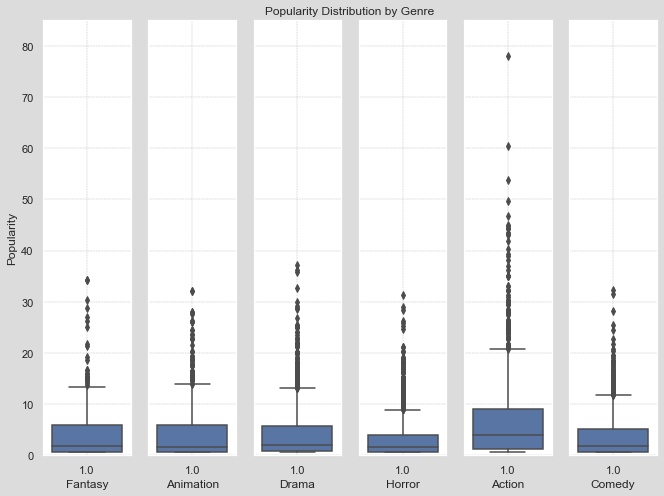

In [404]:
f, axes = plt.subplots(1,6, figsize = (11,8), sharey = True)
sns.boxplot(  y="popularity", x= "Fantasy", data=Fantasy, orient='v' , ax=axes[0])
sns.boxplot(  y="popularity", x= "Animation", data=Animation,  orient='v' , ax=axes[1])
sns.boxplot(  y="popularity", x= "Drama", data=Drama,  orient='v' , ax=axes[2])
sns.boxplot(  y="popularity", x= "Horror", data=Horror,  orient='v' , ax=axes[3])
sns.boxplot(  y="popularity", x= "Action", data=Action,  orient='v' , ax=axes[4])
sns.boxplot(  y="popularity", x= "Comedy", data=Comedy,  orient='v' , ax=axes[5])


for axis in axes:
    axis.grid(color='gray', linestyle='-.', linewidth=0.25)
    axis.set_ylabel('')

axes[0].set_ylabel('Popularity')

plt.ylim(0,85)
plt.title("Popularity Distribution by Genre", x=-2.5)

Text(-3, 1.0, 'Popularity Distribution by Genre')

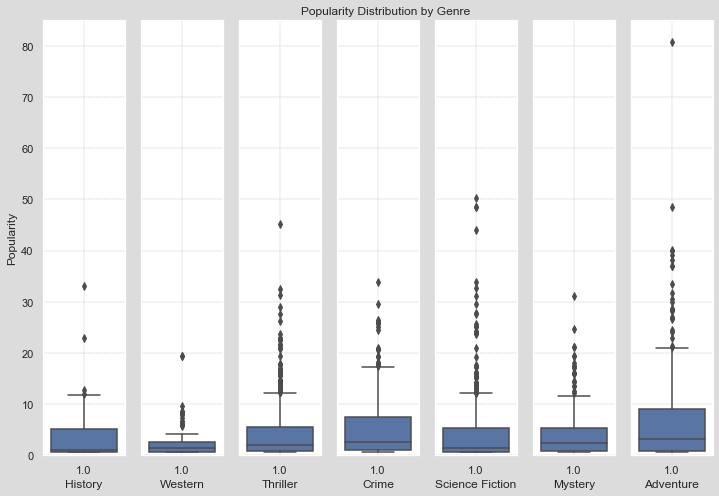

In [409]:
f, axes = plt.subplots(1,7, figsize = (12,8), sharey = True)
sns.boxplot(  y="popularity", x= "History", data=History, orient='v' , ax=axes[0])
sns.boxplot(  y="popularity", x= "Western", data=Western,  orient='v' , ax=axes[1])
sns.boxplot(  y="popularity", x= "Thriller", data=Thriller,  orient='v' , ax=axes[2])
sns.boxplot(  y="popularity", x= "Crime", data=Crime,  orient='v' , ax=axes[3])
sns.boxplot(  y="popularity", x= "Science Fiction", data=Science_Fiction,  orient='v' , ax=axes[4])
sns.boxplot(  y="popularity", x= "Mystery", data=Mystery,  orient='v' , ax=axes[5])
sns.boxplot(  y="popularity", x= "Adventure", data=Adventure,  orient='v' , ax=axes[6])

for axis in axes:
    axis.grid(color='gray', linestyle='-.', linewidth=0.25)
    axis.set_ylabel('')

axes[0].set_ylabel('Popularity')
plt.ylim(0,85)
plt.title("Popularity Distribution by Genre", x=-3)